In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

In [2]:
mdata = pd.read_csv('multi_tread.csv', index_col='step')
sdata = pd.read_csv('single_tread.csv', index_col='step')
mweights = pd.read_csv('multi_weights.csv',header=None)
sweights = pd.read_csv('single_weights.csv',header=None)

In [3]:
mtime = 1000 * mdata.iloc[:, 0].cumsum()
stime = 1000 * sdata.iloc[:, 0].cumsum()

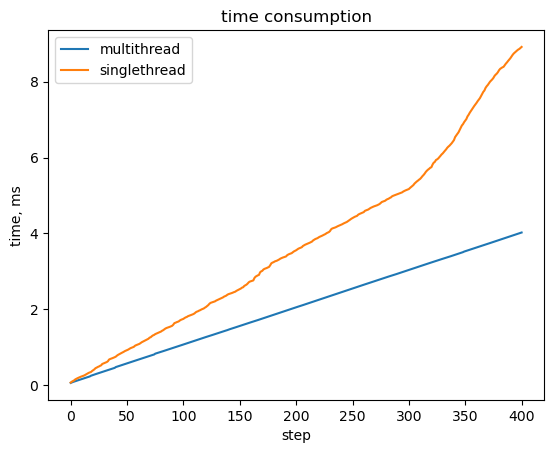

In [4]:
plt.title('time consumption')
plt.plot(mtime, label='multithread')
plt.plot(stime, label='singlethread')
plt.ylabel('time, ms')
plt.xlabel('step')
plt.legend()
plt.show()

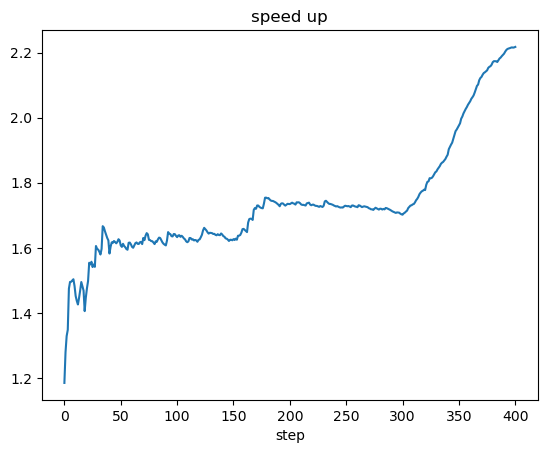

In [5]:
plt.title('speed up')
plt.plot(stime / mtime)
plt.xlabel('step')
plt.show()

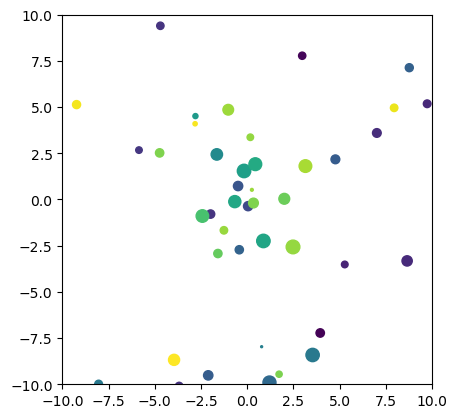

In [6]:
N = 100
FRAMES = 400

points = mdata.iloc[:, 1:].values
camera = Camera(plt.figure())
c = np.random.rand(N,)
m = mweights.values[0, :N]
for i in range(0, FRAMES + 1):
    ax = plt.gca().set_aspect('equal')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    
    plt.scatter(x=points[i,::2], y=points[i,1::2], c=c, s=m/1000)
    camera.snap()

anim = camera.animate(blit=True)
anim.save('scatter.gif')